# ```Monte Carlo``` Simulation Tutorial #

### What is ```Monte Carlo``` Simulation? ###
```Monte Carlo``` simulations are a broad class of algorithms that rely on repeated random sampling to simulate real-world phenomena. The underlying concept is to use randomness to solve problems that might be deterministic in principle but for which it could be hard to know the exact answer. Therefore, randomness is leveraged to estimate the answer.

### Instalation ###
No need for installs.

---

### Importing Dependencies ###

In [1]:
import time
import math
import random
import numpy as np

from IPython.display import display, clear_output

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle
%matplotlib inline

### Main ###
**Problem Statement:** Consider a first quadrant (circular sector) inscribed in a unit square. Prove that the ratio of their areas approximates to ```π/4```, using Monte Carlo.

In [58]:
def update_plot(_x_in, _y_in, _x_out, _y_out, in_counter, out_counter, _pi):
    plt.close()
    # Preparing the data
    _labels = np.linspace(0,1,11)
    _epochs = np.arange(start=1, stop=len(_pi)+1, step=1) # 1-based
    _errors = np.array([np.pi - val for val in _pi]) # 0-based
    _best_epoch = _epochs[np.argmin(np.absolute(_errors), axis=0)] # 0-based
    _best_error = round(_errors[_best_epoch - 1],5) # 0-based 
    _best_pi = round(_pi[_best_epoch - 1],5) # 0-based
    ## Plot
    fig, ax = plt.subplots(nrows= 1, ncols= 2, figsize= (16, 8), dpi=75, 
                           width_ratios=[1,1.5], constrained_layout=True, height_ratios=[1])
    # Rectangle
    ax[0].add_patch(Rectangle(xy= (0, 0),
                              width= 1, height= 1,
                              fill=False, edgecolor= "black", linewidth= 2))
    # Circular Sector
    ax[0].add_patch(Circle(xy= (0, 0),
                           radius= 1,
                           fill=False, edgecolor= "black", linewidth= 2))
    # Scatter (Inside + Outside)
    ax[0].scatter(_x_in, _y_in, marker="o", s=4, c="red", label="Inside")
    ax[0].scatter(_x_out, _y_out, marker="o", s=4, c="blue", label="Inside")
    # Line (Pi Error)
    ax[1].plot(_epochs, _errors, marker="s", markersize=2, linewidth= 2, color= "black")
    # Box Aspect
    ax[0].set_box_aspect(1) # Square axes, no matter what the data limits are
    ax[1].set_box_aspect(0.667) # Matching the aspect ratio (1.0/1.5 ~ 0.6667, where '1.5' comes from subplot's 'width_ratio')
    # Axis Limits
    ax[0].set_xlim(xmin=0, xmax=1)
    ax[0].set_ylim(ymin=0, ymax=1)
    ax[1].set_xlim(xmin=0, xmax=150) # 'xmax': equal to total epochs
    ax[1].set_ylim(ymin=-0.2, ymax=0.2)
    # Ticks
    ax[0].set_xticks(ticks=_labels)
    ax[0].set_yticks(ticks=_labels)
    # Text (Counters)
    ax[0].text(x=0, y=1.025, s="Reds = {}".format(in_counter), c="red")
    ax[0].text(x=0.2, y=1.025, s="Blues = {}".format(out_counter), c="blue")
    ax[0].text(x=0.4, y=1.025, s="pi Value = {}".format(round(_pi[-1],5)), c="black") # Last epoch's pi value 
    ax[1].text(x=0, y=0.2075, s="Best pi Approx = {} / Error = {} (Epoch = {})".format(_best_pi, _best_error, _best_epoch), c="black") # Minimum pi value
                                                                                                                                       # 'y' set manually :/
    # Title
    ax[0].set_title("Monte Carlo Simulation", loc= "center", fontsize= 14, fontname= "sans-serif", pad= 35)
    ax[1].set_title("Approximation Error", loc= "center", fontsize= 14, fontname= "sans-serif", pad= 35) # Plot title
    # Grid
    ax[0].grid(which="both", color= "gray", alpha=0.25)
    ax[1].grid(which="both", color= "gray", alpha=0.25)
    # Show
    display(fig)    
    clear_output(wait=True)

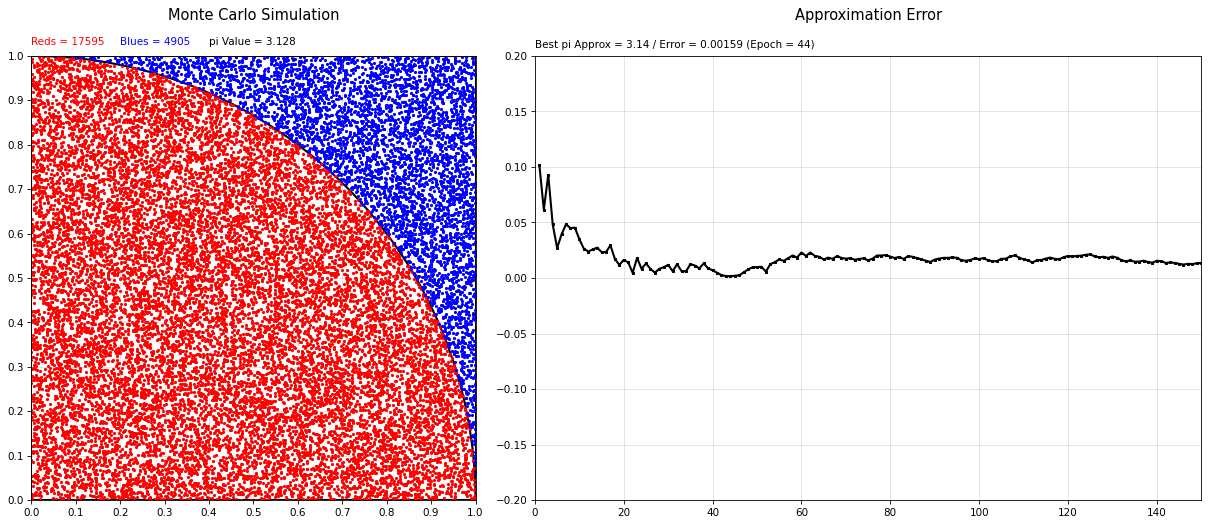

In [59]:
# Placeholders
_x_in = [] # Red
_y_in = []
_x_out = [] # Blue
_y_out = []
_pi = []
# Looping 'epochs'...
for epoch in range(150):
    # Generating batches of 150 points (linearly distributed)
    epoch_x = np.random.uniform(low=0, high=1, size=150) # 'size': ouput format (tuples used for multi-dimensional arrays)
    epoch_y = np.random.uniform(low=0, high=1, size=150)
    # Zipping
    epoch_zip = zip(epoch_x, epoch_y)
    # Populating 'inside'/'outside' lists
    for point in epoch_zip:
        # Checking location (x^2 + y^2 = 1 as frontier)
        if point[0] <= math.sqrt(1 - point[1]**2):
            _x_in.append(point[0])
            _y_in.append(point[1])
        else:
            _x_out.append(point[0])
            _y_out.append(point[1])
    # Preparing the data
    in_counter = len(_x_in)
    out_counter = len(_x_out)
    pi_aprox = (4 * in_counter) / (in_counter + out_counter) # 'pi': pi/4 ~ in_counter/(in_counter + out_counter)
    _pi.append(pi_aprox)
    # Plotting
    update_plot(_x_in, _y_in, _x_out, _y_out, in_counter, out_counter, _pi)

---